**Mengimport Library yang dibutuhkan**

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import zipfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

**Mendownload Dataset di kaggle**

In [ ]:
!kaggle datasets download -ddaggysheep/find-a-car-park

Dataset URL: https://www.kaggle.com/datasets/daggysheep/find-a-car-park
License(s): CC-BY-NC-SA-4.0
100% 5.00G/5.00G [01:12<00:00, 110MB/s]
100% 5.00G/5.00G [01:12<00:00, 74.0MB/s]


**Mengextract file zip**

In [ ]:
#extract zip file
local_zip= '/content/find-a-car-park.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/data-tempat-parkir')
zip_ref.close()

**Menginisialisasi direktori file yang akan dipakai**

In [ ]:
base_dir = os.path.join('/content/data-tempat-parkir/data/data')

In [ ]:
os.listdir(base_dir)

['Free', 'Full']

#melakukan rescale, membagi 20% data menjadi validation
#mengubah posisi gambar dengan memberi zoom,flip, dan rotation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.4,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'wrap'
)

#membagi data menjadi train dan validation

In [ ]:
train_images = train_generator.flow_from_directory(
    base_dir,
    target_size = (150,150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    shuffle = True,
    seed = 42,
    subset = 'training'
)
validation_images = train_generator.flow_from_directory(
    base_dir,
    target_size = (150,150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    shuffle = False,
    seed = 42,
    subset = 'validation'
)

Found 1958 images belonging to 2 classes.
Found 1304 images belonging to 2 classes.


#membuat model


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=20,
                    callbacks=[
                      tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',patience=5,restore_best_weights=True) ]
)


Epoch 1/20
62/62 [==============================] - 80s 1s/step - loss: 0.5886 - accuracy: 0.7206 - val_loss: 0.5461 - val_accuracy: 0.7592
Epoch 2/20
62/62 [==============================] - 73s 1s/step - loss: 0.5036 - accuracy: 0.7390 - val_loss: 0.6743 - val_accuracy: 0.7308
Epoch 3/20
62/62 [==============================] - 83s 1s/step - loss: 0.4409 - accuracy: 0.7824 - val_loss: 0.6878 - val_accuracy: 0.6319
Epoch 4/20
62/62 [==============================] - 71s 1s/step - loss: 0.3867 - accuracy: 0.8248 - val_loss: 0.9759 - val_accuracy: 0.6641
Epoch 5/20
62/62 [==============================] - 83s 1s/step - loss: 0.3624 - accuracy: 0.8478 - val_loss: 0.8681 - val_accuracy: 0.6572
Epoch 6/20
62/62 [==============================] - 69s 1s/step - loss: 0.3066 - accuracy: 0.8636 - val_loss: 0.7154 - val_accuracy: 0.6771


#Menampilkan hasil akurasi pengujian data menggunakan grafik

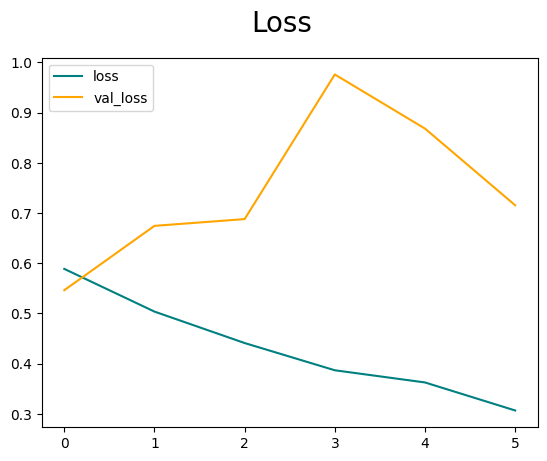

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal', label='loss')
plt.plot(history.history['val_loss'],color='orange', label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

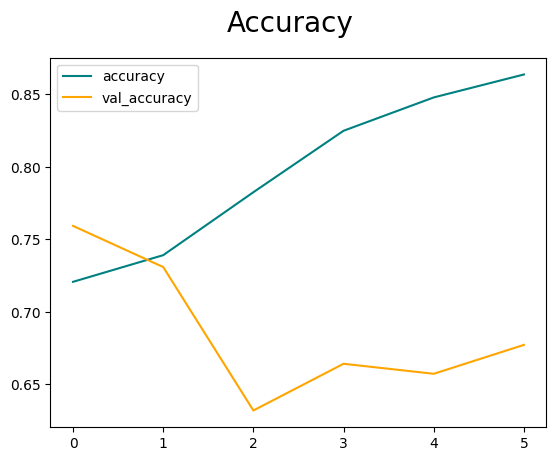

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange', label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Saving img_1006144558.jpg to img_1006144558 (5).jpg
1/1 [==============================] - 0s 28ms/step


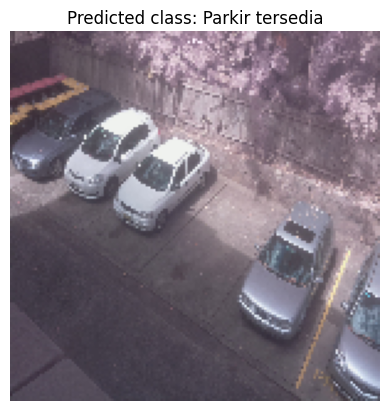

In [ ]:
# Fungsi untuk memprediksi gambar dan menampilkan
def predict_and_display_image(model, img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)

    # Mendapatkan kelas prediksi
    predicted_class = np.argmax(predictions)
    class_names = ['Parkir tersedia', 'parkir full']

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {class_names[predicted_class]}")
    plt.show()

# Upload gambar untuk diprediksi
uploaded = files.upload()

# Ambil nama file gambar yang diupload
img_path = list(uploaded.keys())[0]

# Melakukan prediksi dan menampilkan gambar menggunakan model
predict_and_display_image(model, img_path)
